<a href="https://colab.research.google.com/github/metehan41/DataMiningProject/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

</h1>👨‍💻<strong>About Dataset</strong>👨‍💻</h1>

</h1><strong>Context</strong></h1>

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

</h1><strong>Attribute Information</strong></h1>

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.  

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.  

Description: Product (item) name. Nominal.  

Quantity: The quantities of each product (item) per transaction. Numeric.  

InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.  

UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).  

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.  

Country: Country name. Nominal. The name of the country where a customer resides.</p>

In [16]:
df = pd.read_csv('/content/drive/MyDrive/DataMiningProject/data/online_retail_II.csv')

In [69]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,month,day,hour,minute,day_of_week,day_name
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,45,1,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,45,1,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,45,1,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,45,1,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,45,1,Tuesday


In [37]:
# prompt: make invoiceDate datatime and split

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['hour'] = df['InvoiceDate'].dt.hour
df['minute'] = df['InvoiceDate'].dt.minute

In [39]:
# Create a new column for the day of the week (0 - Monday, 1 - Tuesday, ..., 6 - Sunday)
df['day_of_week'] = df['InvoiceDate'].dt.dayofweek

# Map numerical values to actual day names if needed
day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['day_name'] = df['day_of_week'].map(day_map)

In [123]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,month,day,hour,minute,day_of_week,day_name
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,45,1,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,45,1,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,45,1,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,45,1,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,45,1,Tuesday


In [105]:
# Count occurrences of each value in the 'Quantity' column
quantity_counts = df['Quantity']

# Filter the DataFrame to show rows where the count of values is less than zero
filtered_df = df[df['Quantity'].isin(quantity_counts[quantity_counts < 0].index)]

print(filtered_df)

        Invoice StockCode                          Description  Quantity  \
217      489460     84598        BOYS ALPHABET IRON ON PATCHES       576   
950      489539     16237                 SLEEPING CAT ERASERS       180   
3234     489671     21543    BUTTERFLY WATER TRANSFER TATTOOS        200   
3235     489671     21541    DINOSAURS WATER TRANSFER TATTOOS        200   
3570     489726     21428  SET3 BOOK BOX GREEN GINGHAM FLOWER        200   
...         ...       ...                                  ...       ...   
1058678  581020     20668      DISCO BALL CHRISTMAS DECORATION       576   
1059675  581138     20724          RED RETROSPOT CHARLOTTE BAG       200   
1062824  581256     22355            CHARLOTTE BAG SUKI DESIGN       205   
1065523  581457     82484    WOOD BLACK BOARD ANT WHITE FINISH       204   
1067006  581501     22319    HAIRCLIPS FORTIES FABRIC ASSORTED       180   

                InvoiceDate  Price  Customer ID         Country  year  month  \
217    

In [19]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("##################### Properties #####################")
    print(df.describe())

check_df(df)

##################### Shape #####################
(1067371, 8)
##################### Types #####################
Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object
##################### NA #####################
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64
##################### Quantiles #####################
                 0.00      0.05     0.50      0.95     0.99     1.00
Quantity    -80995.00      1.00      3.0     30.00    100.0  80995.0
Price       -53594.36      0.42      2.1      9.95     18.0  38970.0
Customer ID  12346.00  12681.00  15255.0  17911.00  18207.0  18287.0
##################### Properties #####################
           Quantity         Price    Customer ID
count  1.067371e+06

In [47]:
# Count the number of cancellations (invoices starting with 'C')
cancellation_count = df[df['Invoice'].str.startswith('C')]['Invoice'].count()
cancellation_percentage = cancellation_count / df.shape[0] * 100
print(f"Number of cancellations: {cancellation_count} \nPercantage of cancellations {cancellation_percentage}")

Number of cancellations: 19494 
Percantage of cancellations 1.8263565339511754


In [126]:
df["Country"].value_counts()

United Kingdom          723864
Germany                  16031
EIRE                     15715
France                   13325
Netherlands               4983
Spain                     3618
Switzerland               2955
Belgium                   2921
Portugal                  2382
Australia                 1806
Channel Islands           1567
Italy                     1437
Norway                    1409
Sweden                    1269
Cyprus                    1148
Finland                    986
Austria                    888
Denmark                    775
Greece                     653
Unspecified                518
Poland                     506
Japan                      485
USA                        404
United Arab Emirates       380
Singapore                  332
Israel                     322
Malta                      277
Iceland                    253
Canada                     227
Lithuania                  189
RSA                        122
Brazil                      94
Thailand

### Cleaning

In [124]:
df.dropna(inplace=True)
df = df[~df["Invoice"].str.contains("C") &
        ~df["StockCode"].str.contains("POST") &
        ~df["StockCode"].str.contains("M") &
        ~df["StockCode"].str.contains("DOT", na=False) &
         (df["Quantity"] > 0) &
         (df["Price"] > 0)]

### Outlier Analyis and Preprocessing

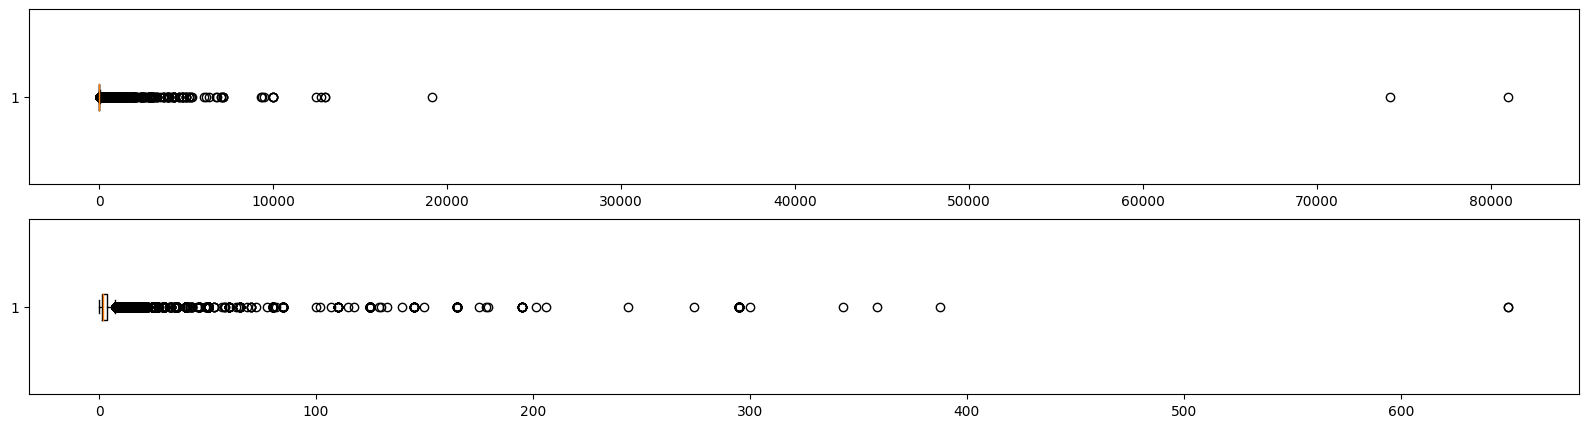

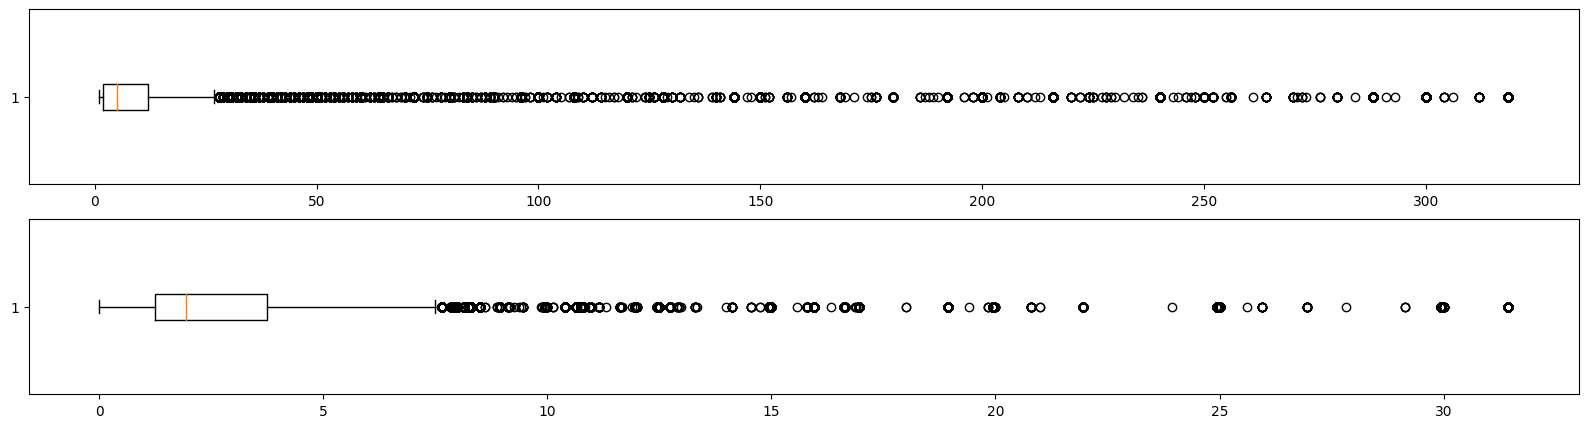

In [125]:
import matplotlib.pyplot as plt

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

f, ax = plt.subplots(2,1, figsize = (20,5))
col_list = ["Quantity", "Price"]
for i in range(0,2):
    ax[i].boxplot(df[col_list[i]], vert = 0)
plt.show()

replace_with_threshold(df, "Quantity")
replace_with_threshold(df, "Price")

f, ax = plt.subplots(2,1, figsize = (20,5))
col_list = ["Quantity", "Price"]
for i in range(0,2):
    ax[i].boxplot(df[col_list[i]], vert = 0)
plt.show()

### Countries Number Of Transaction

In [127]:
# Generate a bar plot using Plotly Express based on value counts of 'Country'
fig = px.bar(
    df['Country'].value_counts().reset_index(),
    x='index',
    y='Country',
    labels={'index': 'Country', 'Country': 'Count'},
    title='Count of Occurrences for Each Country'
)

# Show the plot
fig.show()

### Top 30 Most Frequent Product

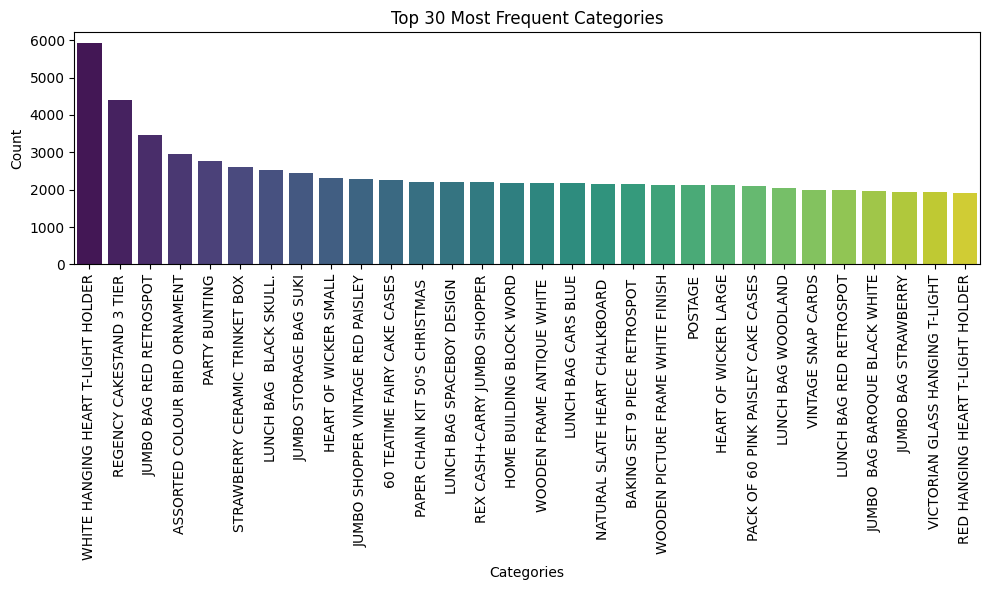

In [122]:
# Assuming 'Category' is the name of your categorical column
top_categories = df['Description'].value_counts().nlargest(30)  # Change '10' to the number of top categories you want

plt.figure(figsize=(10, 6))  # Set the figure size

# Create a bar plot using seaborn
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.title('Top 30 Most Frequent Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Transaction Numer of per Product

In [107]:
# Count occurrences of each StockCode
stockcode_counts = df['StockCode'].value_counts().reset_index()
stockcode_counts.columns = ['StockCode', 'Count']

# Create a bar plot using Plotly Express
fig = px.bar(
    stockcode_counts,
    x='StockCode',
    y='Count',
    labels={'StockCode': 'Stock Code', 'Count': 'Occurrences'},
    title='Occurrences of Each StockCode'
)

# Show the plot
fig.show()

###Top 30 Most Frequent Quantity

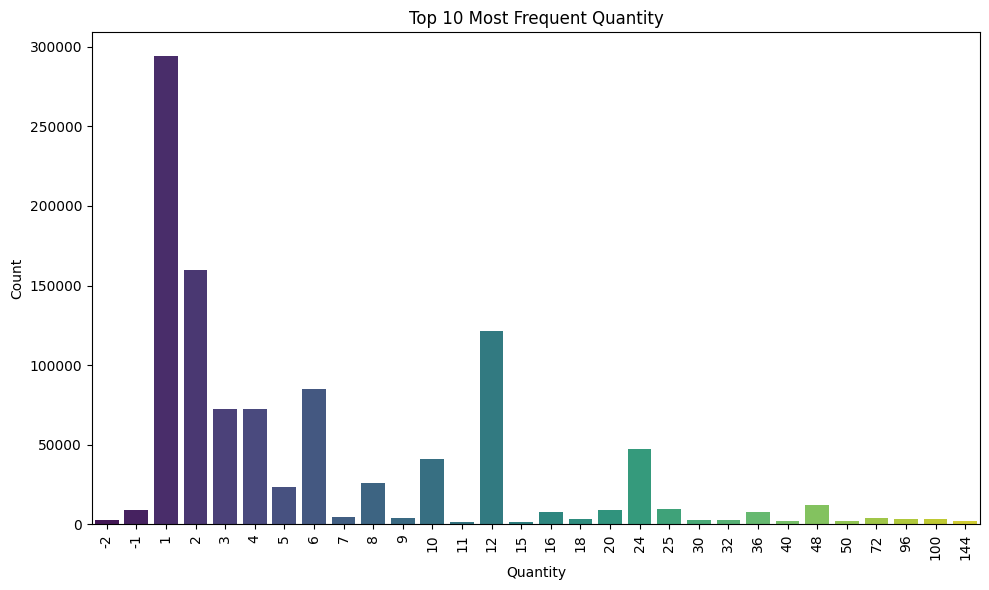

In [108]:
# Assuming 'Category' is the name of your categorical column
top_categories = df['Quantity'].value_counts().nlargest(30)  # Change '10' to the number of top categories you want

plt.figure(figsize=(10, 6))  # Set the figure size

# Create a bar plot using seaborn
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.title('Top 10 Most Frequent Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Average Spend per Week Day

In [109]:
# Calculate average price per weekday
avg_price_per_weekday = df.groupby('day_name')['Price'].mean().reset_index()

# Define the order of weekdays
custom_weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort weekdays based on custom order
avg_price_per_weekday['day_name'] = pd.Categorical(avg_price_per_weekday['day_name'], categories=custom_weekday_order, ordered=True)
avg_price_per_weekday = avg_price_per_weekday.sort_values('day_name')

# Create a line plot using Plotly Express
fig = px.line(
    avg_price_per_weekday,
    x='day_name',
    y='Price',
    labels={'WeekdayName': 'Weekday', 'UnitPrice': 'Average Price'},
    title='Average Price per Weekday'
)

# Show the plot
fig.show()

###Total Spend per Week Day

In [110]:
# Calculate average price per weekday
total_price_per_weekday = df.groupby('day_name')['Price'].sum().reset_index()

# Define the order of weekdays
custom_weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort weekdays based on custom order
total_price_per_weekday['day_name'] = pd.Categorical(total_price_per_weekday['day_name'], categories=custom_weekday_order, ordered=True)
total_price_per_weekday = total_price_per_weekday.sort_values('day_name')

# Create a line plot using Plotly Express
fig = px.line(
    total_price_per_weekday,
    x='day_name',
    y='Price',
    labels={'WeekdayName': 'Weekday', 'UnitPrice': 'Average Price'},
    title='Total Spend per Weekday'
)

# Show the plot
fig.show()

### Total Spend per Product

In [111]:
total_price_per_description = df.groupby('Description')['Price'].sum().reset_index()

# Select the top 10 Descriptions based on total price
top_30_descriptions = total_price_per_description.nlargest(30, 'Price')

# Create a bar plot using Plotly Express
fig = px.bar(
    top_30_descriptions,
    x='Description',
    y='Price',
    labels={'Description': 'Product Description', 'TotalPrice': 'Total Price'},
    title='Top 10 Total Prices per Product'
)

# Show the plot
fig.show()

### Top 30 Product Buyed

In [112]:
total_Quantity_per_description = df.groupby('Description')['Quantity'].sum().reset_index()

# Select the top 10 Descriptions based on total price
top_30_descriptions = total_Quantity_per_description.nlargest(30, 'Quantity')

# Create a bar plot using Plotly Express
fig = px.bar(
    top_30_descriptions,
    x='Description',
    y='Quantity',
    labels={'Description': 'Product Description', 'TotalPrice': 'Total Price'},
    title='Top 30 Total Prices per Product'
)

# Show the plot
fig.show()

### Tansaction Number per Year

In [119]:
# Generate a pie chart using Plotly Express based on value counts of 'year'
fig = px.pie(
    df['year'].value_counts().reset_index(),
    values='year',
    names='index',
    labels={'index': 'Year', 'year': 'Count'},
    title='Distribution of Occurrences for Each Year'
)

# Show the plot
fig.show()

### Tansaction Number per Month

In [117]:
# Generate a bar plot using Plotly Express based on value counts of 'year'
fig = px.bar(
    df['month'].value_counts().reset_index(),
    x='index',
    y='month',
    labels={'index': 'month', 'month': 'Count'},
    title='Count of Occurrences for Each month'
)

# Update x-axis title
fig.update_xaxes(title='month')

# Show the plot
fig.show()

### Transaction Number per WeekDay

In [121]:
import plotly.express as px

# Count occurrences of each day
day_counts = df['day_of_week'].value_counts().sort_index()

# Mapping numerical values to actual day names for labeling purposes
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot using Plotly Express
fig = px.bar(
    x=day_names,
    y=day_counts,
    labels={'x': 'Day of the Week', 'y': 'Count'},
    title='Count of Occurrences for Each Day of the Week'
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=90)

# Show the plot
fig.show()